In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MBTA_Monthly_Ridership.csv', low_memory=False )


df["Month"] = df["month_of_service"].astype(str).str[5:7]  # Extracts "MM" part

df["Year"] = df["month_of_service"].astype(str).str[0:4]
# Define month mapping
month_map = {
    "01": "January", "02": "February", "03": "March", "04": "April",
    "05": "May", "06": "June", "07": "July", "08": "August",
    "09": "September", "10": "October", "11": "November", "12": "December"
}

# Apply month name mapping
df["Month"] = df["Month"].map(month_map)

# Pivot table: Rows = Month, Columns = Route, Values = Average Ridership
pivot_table = df.pivot_table(index=("Month", "Year", "daytype"), columns="route_or_line", values="ridership_average")


def pivot_converter(name, year, month, type):
    #want quality info only looking at one measure
    years = ["2018", "2019", '2020', '2021', '2022', '2023', '2024']
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    
    values = []
    
    if year and month == '':
        return []
    else:
        if year == '':
            values = [pivot_table.loc[(month, x, type), name] for x in years]
            return values
        elif month == '':
            values = [pivot_table.loc[(x, '2022',  'Total'), 'Blue Line' ] for x in months]
            return values
    return values



value = pivot_converter("Blue Line", '', '', 'Total')
print(value)


KeyError: ('', '2018', 'Total')

After extracting and cleaning the data we will look at tests such as T-Test, Z-Test, and Interval Confidence

Null Hypothesis: 
There is no correlation between pre-covid vs covid vs post-covid years and ridership on the MBTA.

Alternate Hypothesis:
There is higher ridership on MBTA pre-covid vs decreased ridership post-covid.





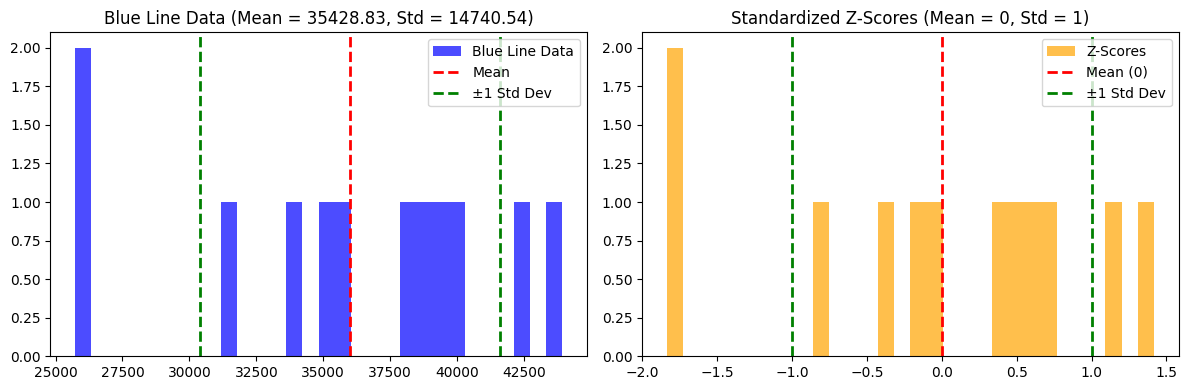

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot original data
ax1.hist(value, bins=30, alpha=0.7, color='blue', label="Blue Line Data")
ax1.axvline(np.mean(value), color='red', linestyle='dashed', linewidth=2, label='Mean')
ax1.axvline(np.mean(value) + np.std(value), color='green', linestyle='dashed', linewidth=2, label='±1 Std Dev')
ax1.axvline(np.mean(value) - np.std(value), color='green', linestyle='dashed', linewidth=2)
ax1.set_title('Blue Line Data (Mean = {:.2f}, Std = {:.2f})'.format(np.mean(pivot_table['Blue Line']), np.std(pivot_table['Blue Line'])))
ax1.legend()

mean = np.mean(value)
std_dev = np.std(value)
z_scores = (value - mean) / std_dev
# Plot Z-scores
ax2.hist(z_scores, bins=30, alpha=0.7, color='orange', label='Z-Scores')
ax2.axvline(0, color='red', linestyle='dashed', linewidth=2, label='Mean (0)')
ax2.axvline(1, color='green', linestyle='dashed', linewidth=2, label='±1 Std Dev')
ax2.axvline(-1, color='green', linestyle='dashed', linewidth=2)
ax2.set_title('Standardized Z-Scores (Mean = 0, Std = 1)')
ax2.legend()

plt.tight_layout()
plt.show()